<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [264]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [265]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [266]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
# Se genera el df
df = pd.read_csv("titanic.csv")
df.head()

des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [267]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [268]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df1 = df.copy()
df1 = df1[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df1.head()
df1.shape

(891, 6)

In [269]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
#des = df1.describe()
#des.loc['Nan'] = df1.isna().sum()
#des.loc['%Nan'] = (df1.isna().mean())*100
#des
df1.dropna(inplace=True)

In [270]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
print(f'Tenemos {df1.shape[0]} filas para analizar')

Tenemos 714 filas para analizar


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [271]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [272]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
df1["Survived"].value_counts()


,count
Survived,
0,424
1,290


Text(0.5, 1.0, 'Sobrevivientes por género')

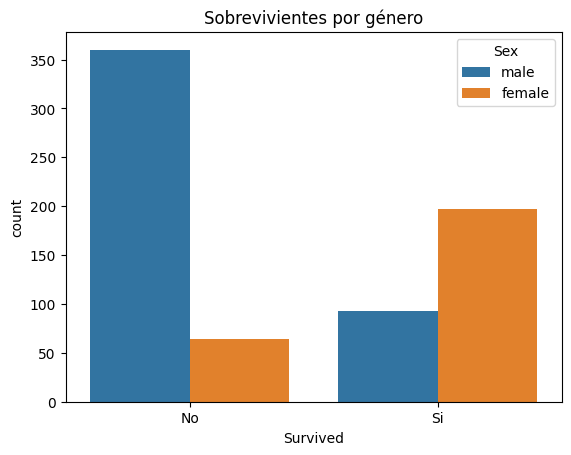

In [302]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
ax = sns.countplot(x=df1['Survived'].replace({0: 'No', 1: 'Si'}), hue=df1['Sex'])
ax.set_title('Sobrevivientes por género')
#sns.countplot(x="Survived", hue="Sex", data=df1)

<Axes: xlabel='Pclass', ylabel='count'>

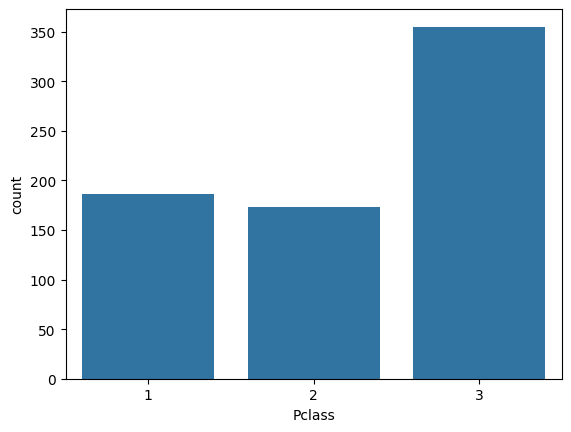

In [274]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(x="Pclass", data=df1)

<Axes: xlabel='Pclass', ylabel='count'>

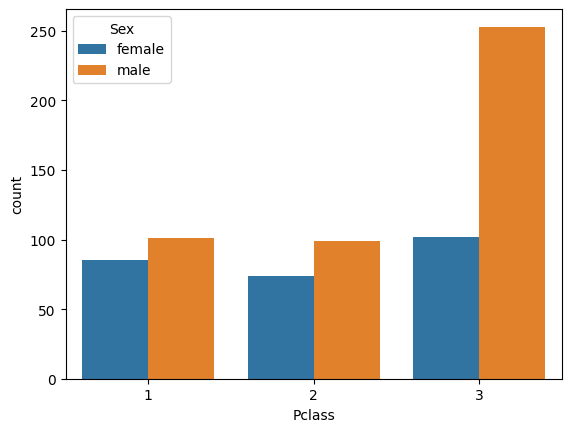

In [275]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x="Pclass", hue="Sex", data=df1)


#### Transformar variables categóricas texto a clases numeradas

In [276]:
from sklearn.preprocessing import LabelEncoder

In [277]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df1.copy()

In [278]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
# LabelEncoder

le = LabelEncoder()

# Aplica el LabelEncoder a la columna 'Sex' y guarda los valores transformados
df_cod['Sex'] = le.fit_transform(df_cod['Sex'])


In [279]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
print(f'Clases codificadas: {le.classes_}')


Clases codificadas: ['female' 'male']


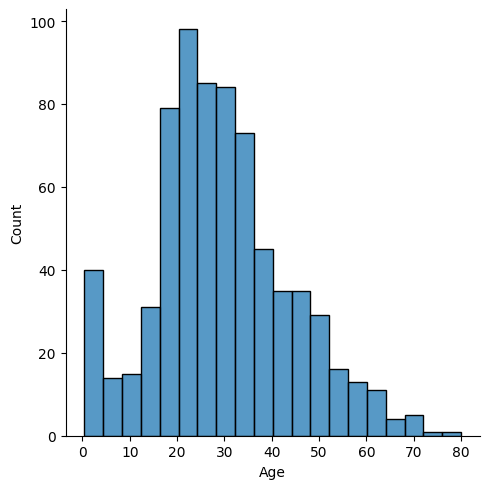

In [280]:
# Alumno: Analizar la distribución de la edad
sns.displot(data=df_cod, x='Age')

# Muestra la figura
plt.show()

In [281]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_norm = df_cod.copy()

In [282]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final
# StandarScaler
from sklearn.preprocessing import StandardScaler

# Instancia el StandardScaler
scaler = StandardScaler()

# Normaliza la columna 'Age' y actualiza el DataFrame
df_norm['Age'] = scaler.fit_transform(df_norm[['Age']])

# Ver las primeras filas para comprobar el resultado
print('Media después de escalado:', df_norm['Age'].mean())
print('Desviación estándar después de escalado:', df_norm['Age'].std())
df_norm.head()

Media después de escalado: 2.338621049070358e-16
Desviación estándar después de escalado: 1.000701016559981


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,-0.530377,1,0
1,1,1,0,0.571831,1,0
2,1,3,0,-0.254825,0,0
3,1,1,0,0.365167,1,0
4,0,3,1,0.365167,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [283]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_norm.drop('Survived', axis=1).values
y = df_norm['Survived'].values

In [284]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape = X.shape[1]

In [285]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape = 1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [286]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [287]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta
def create_model(input_size, hidden_neurons, output_size):
  '''Función que recibe en input_size las entradas a la red (cantidad de columnas),
  hidden_neurons (cantidad de neuronas) y output_size (salida de la red). Esta
  función tiene el objetivo crea un model con redes neuronales para clasificación'''
  # Se crea el objeto model2 a partir de la clase Sequential()
  model = Sequential()

  # Crear la capa de entrada y la capa oculta (hidden) de la red, que tendrá:
  # --> tantas entradas (input_shape) como columnas (input_size)
  # --> tantas neuronas como deseemos
  # --> utilizamos "sigmoid" como capa de activación
  model.add(Dense(units=hidden_neurons, activation='sigmoid', input_shape=(input_size,)))

  # Crear la capa de salida, que tendrá tantas neuronas como salidas posibles (2 opciones sigmoid)
  model.add(Dense(units=output_size, activation='sigmoid'))

  return model

In [288]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"
model = create_model(in_shape, 50, out_shape)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [289]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=50, batch_size=32)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4175 - loss: 0.9666 - val_accuracy: 0.5478 - val_loss: 0.6801
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5768 - loss: 0.6647 - val_accuracy: 0.5478 - val_loss: 0.6849
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5972 - loss: 0.6396 - val_accuracy: 0.6522 - val_loss: 0.6398
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7076 - loss: 0.6023 - val_accuracy: 0.6435 - val_loss: 0.6352
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6432 - loss: 0.5985 - val_accuracy: 0.6522 - val_loss: 0.6240
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6823 - loss: 0.5797 - val_accuracy: 0.6696 - val_loss: 0.6033
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7121 - loss: 0.5762 - val_accuracy: 0.6696 - val_loss: 0.5953
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7262 - loss: 0.5535 - val_accuracy: 0.7217 - val_loss

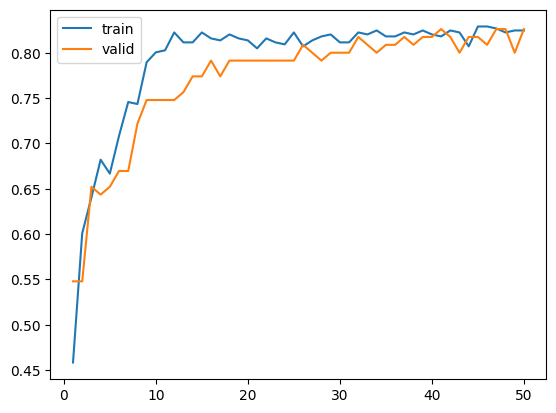

In [290]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line
epocas_conteo= range(1, len(history.history['accuracy']) + 1)

# De Seaborn (sns) se accede al gráfico de línea para representar;
# Por un lado, el 'accuracy',
# Por el otro, la validación (val_accuracy)
sns.lineplot(x=epocas_conteo,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epocas_conteo,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [291]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test
y_hat_prob = model.predict(X_test)
#y_hat_prob

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [292]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat
y_hat = [1 if x >= 0.5 else 0 for x in y_hat_prob]
#y_hat

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [293]:
# Alumno, calcular la exactitud (accuracy) de su modelo
model.summary()

scores = model.evaluate(X_test, y_test)
scores[1]

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 50)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,055 (4.12 KB)

 Trainable params: 351 (1.37 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 704 (2.75 KB)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7280 - loss: 0.4892


0.7622377622377622

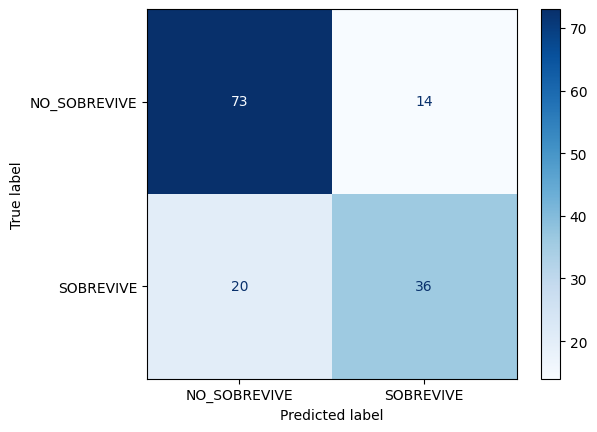

In [294]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']

# Se utiliza la matriz de confusión para evaluar la precisión de una clasificación.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Necesita dos variables que contengan los valores a comparar
cm = confusion_matrix(y_test, y_hat)

# Código para realizar la representación gráfica con los resultados
# Se crea la varible cmd, que almacena visualization de la Confusion Matrix
# Necesita la variable cm que contiene los resultados de la comparación entre los valores reales y predicción
# display_labels, se especifica las etiquetas de las categorias que se evalúan.
cmd = ConfusionMatrixDisplay(cm, display_labels=['NO_SOBREVIVE', 'SOBREVIVE'])

# Con cmd.plot se especifica el mapa de colores reconocido por matplotlib.
cmd.plot(cmap=plt.cm.Blues)

# Mostrar la figura
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [303]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo

# Codificación del género
df_cod['Sex'] = le.fit_transform(df_cod['Sex'])

# Preparar datos de prueba
prueba = pd.DataFrame({'Pclass': [2], 'Sex': [0], 'Age': [28], 'SibSp': [1], 'Parch': [0]})

# Normalizar la columna 'Age' en el DataFrame de prueba usando el scaler entrenado
prueba['Age'] = scaler.transform(prueba[['Age']])

# Mostrar el DataFrame de prueba después de la normalización
print("Datos de prueba normalizados:")
print(prueba)

# Preparar datos para predicción
X_prueba = prueba.values  # Convertir a numpy array
y_prueba = np.array([0])  # Valores de prueba, no se usan para la predicción en este caso

# Hacer predicciones
prediccion = model.predict(X_prueba)

# Si el modelo es binario, no necesitas np.argmax, solo umbral para binaria
resultado = [1 if p >= 0.5 else 0 for p in prediccion]

# Mostrar el resultado
print("Probabilidad de haber sobrevivido:", prediccion[0][0])
if resultado[0] == 1:
    print('¡Sobrevivió!')
else:
    print('Game Over')

Datos de prueba normalizados:
   Pclass  Sex       Age  SibSp  Parch
0       2    0 -0.117049      1      0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Probabilidad de haber sobrevivido: 0.82504874
¡Sobrevivió!
